<a href="https://colab.research.google.com/github/venu72561-chinnam/AI-ML-project/blob/main/multiregression_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [9]:
df=pd.read_csv('/content/creditcard 2.csv')


In [10]:
X = df.drop(["Amount", "Class"], axis=1)
y = df["Amount"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test_scaled)


In [15]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [16]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 4333.019546066789
Mean Absolute Error: 24.396598398954534
R² Score: 0.918001070743673


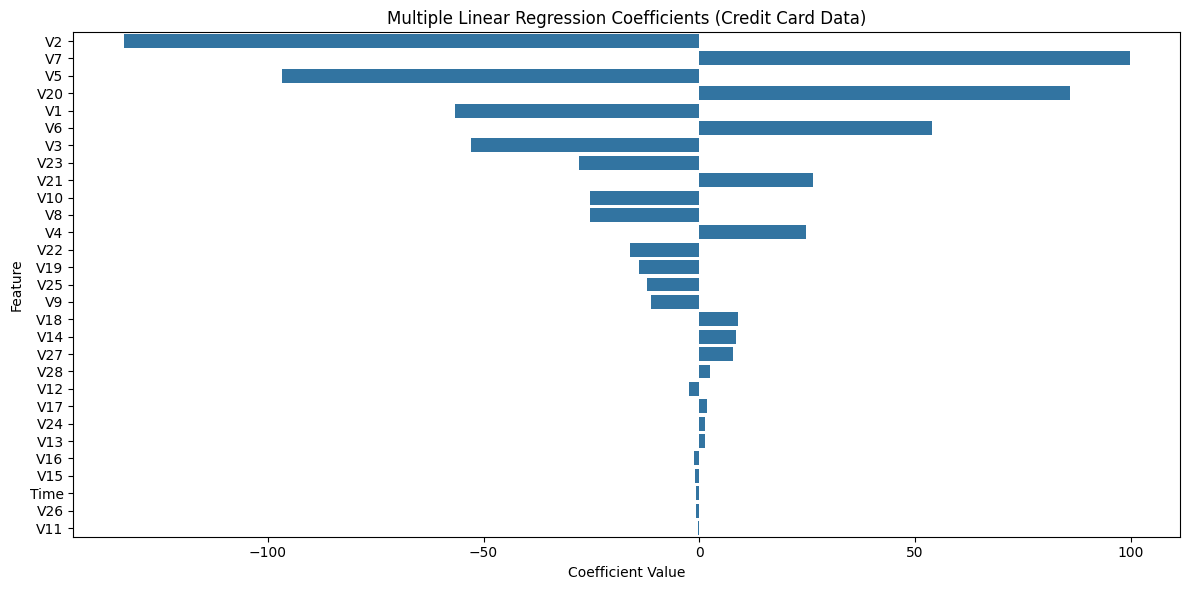

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
})


coef_df["abs_coef"] = abs(coef_df["coefficient"])


coef_df_sorted = coef_df.sort_values("abs_coef", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="coefficient",
    y="feature",
    data=coef_df_sorted
)

plt.title("Multiple Linear Regression Coefficients (Credit Card Data)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()